In [79]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings; warnings.filterwarnings("ignore"); warnings.simplefilter('ignore')

In [80]:
df=pd.read_csv('E:\JUPYTER NOTE BOOK\Dataset/Fs_dataset.csv')
df.head()

,RS,WS,TA,UTS
0,1812,26,2.00,371.54
1,1569,35,1.65,440.00
2,1569,35,2.00,431.00
3,1569,26,1.65,418.59
4,1569,35,1.30,396.66


In [81]:
df.describe()

,RS,WS,TA,UTS
count,60.00000,60.00000,60.000000,60.000000
mean,1568.75000,34.75000,1.650000,428.505667
std,173.63371,6.06637,0.249576,30.922975
min,1325.00000,26.00000,1.300000,336.600000
25%,1508.00000,32.75000,1.562500,422.025000
50%,1569.00000,35.00000,1.650000,437.800000
75%,1629.75000,37.00000,1.737500,447.225000
max,1812.00000,43.00000,2.000000,478.400000


In [82]:
x=df[['RS', 'WS', 'TA']]
y=df['UTS']

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state =3)

Scaling
https://www.youtube.com/watch?v=goMoUHl8q6c&t=429s

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Linear Regresion Machine learing model**

In [86]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [87]:
r2_score(y_test, y_pred)

0.7810236521734591

<AxesSubplot:xlabel='UTS', ylabel='Density'>

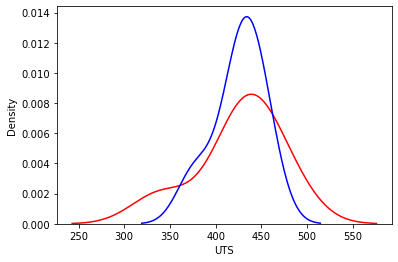

In [88]:
ax1=sns.distplot(y_test,hist=False,color='r',label='actual values')
sns.distplot(y_pred,hist=False,color='b',label='Predicted _values',ax=ax1)

<AxesSubplot:>

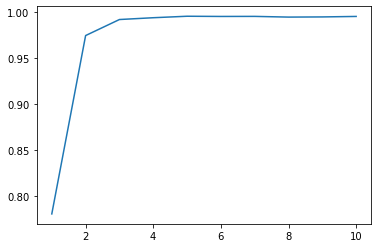

In [89]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
requ_test=[]
order=[1,2,3,4,5,6,7,8,9,10]
for i in order:
  pr=PolynomialFeatures(degree=i)
  x_train_pr=pr.fit_transform(X_train)
  x_test_pr=pr.fit_transform(X_test)
  regressor.fit(x_train_pr,y_train)
  requ_test.append(regressor.score(x_test_pr,y_test))
sns.lineplot(x=order,y=requ_test) 

In [90]:
pr=PolynomialFeatures(degree=4)
x_train_pr=pr.fit_transform(X_train)
x_test_pr=pr.fit_transform(X_test)
regressor.fit(x_train_pr,y_train)
y_pred_pr=regressor.predict(x_test_pr)
r2_score(y_pred_pr,y_test)

0.994085618508697

<AxesSubplot:xlabel='UTS', ylabel='Density'>

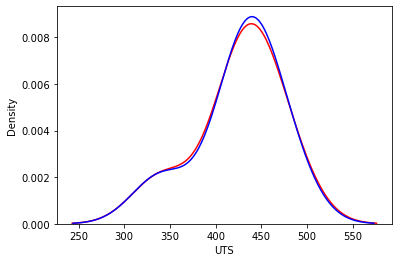

In [91]:
ax1=sns.distplot(y_test,hist=False,color='r',label='actual values')
sns.distplot(y_pred_pr,hist=False,color='b',label='Predicted _values',ax=ax1)

In [92]:
y_pred_pr

array([476.61425781, 430.21972656, 444.09960938, 340.36425781,
       442.67675781, 419.77050781])

In [93]:
y_test

47    478.40
18    430.26
56    449.00
13    340.54
37    437.60
23    416.70
Name: UTS, dtype: float64

In [94]:
mean_squared_error(y_test,y_pred_pr)

10.406116469573936

# **Decision Tree**

In [95]:
from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor(criterion='squared_error',max_leaf_nodes=25,random_state=0)
decision_tree.fit(X_train,y_train)
y_pred_dt=decision_tree.predict(X_test)
y_pred_dt

array([476.375     , 430.2       , 443.76352941, 339.8       ,
       440.47      , 419.445     ])

In [96]:
y_test

47    478.40
18    430.26
56    449.00
13    340.54
37    437.60
23    416.70
Name: UTS, dtype: float64

In [97]:
r2_score(y_test,y_pred_dt)

0.9955762436159243

<AxesSubplot:xlabel='UTS', ylabel='Density'>

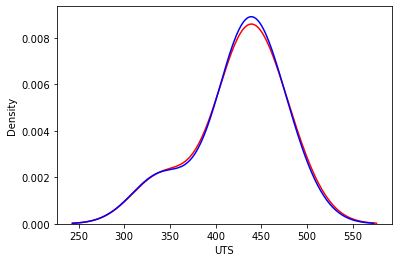

In [98]:
ax1=sns.distplot(y_test,hist=False,color='r',label='actual values')
sns.distplot(y_pred_dt,hist=False,color='b',label='Predicted _values',ax=ax1)

In [99]:
mean_squared_error(y_test,y_pred_dt)

7.974062370242131

# Random Forest Regressor

In [100]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=2)
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
rf_pred[:10]

array([476.0375    , 431.05      , 444.23428571, 339.8       ,
       440.055     , 419.8725    ])

In [101]:
y_test

47    478.40
18    430.26
56    449.00
13    340.54
37    437.60
23    416.70
Name: UTS, dtype: float64

In [102]:
r2_score(y_test,rf_pred)

0.9957877447527453

<AxesSubplot:xlabel='UTS', ylabel='Density'>

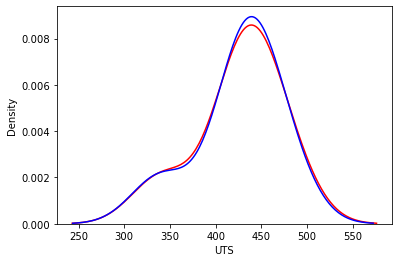

In [103]:
ax1=sns.distplot(y_test,hist=False,color='r',label='actual values')
sns.distplot(rf_pred,hist=False,color='b',label='Predicted _values',ax=ax1)

<AxesSubplot:xlabel='UTS'>

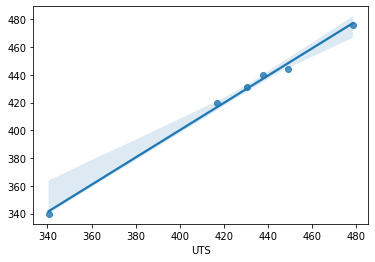

In [104]:
sns.regplot(y_test,rf_pred)